In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

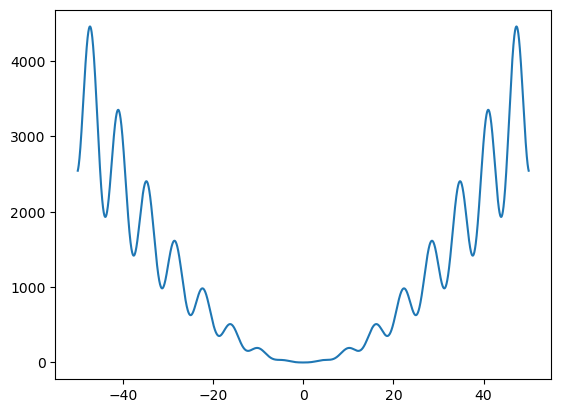

In [2]:
x = np.linspace(-50, 50, 5000)
def func1(x): return (x**2)*(np.sin(0.5*x)**2+1)
def grad1(x): return 2*x
plt.plot(x, func1(x))
plt.show()

In [3]:
def calculate_grad(func, x0, delta=0.01): 
    return (func(x0+delta)-func(x0))/delta


def calculate_grad2(func, x0, delta=0.01): 
    return (func(x0+delta)-func(x0-delta))/(2*delta)

In [4]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad 18.601418576694456
method1 42.30009012639755
method2 42.48321320972792


In [5]:
x0=np.random.uniform(-50, 50)
alpha=0.4
n_iter=40
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

-43.492258524319304 2002.8819478247308
-8.698451704863857 141.77817495625143
-1.7396903409727713 4.7941511395227945
-0.3479380681945541 0.12468802019640068
-0.0695876136389108 0.004848295903226136
-0.013917522727782156 0.00019370681840138925
-0.0027835045455564308 7.747912562602753e-06
-0.0005567009091112861 3.0991592621729837e-07
-0.0001113401818222572 1.2396636126632438e-08
-2.2268036364451432e-05 4.95865443590002e-10
-4.453607272890285e-06 1.9834617741239598e-11
-8.907214545780567e-07 7.933847096458064e-13
-1.7814429091561125e-07 3.1735388385826185e-14
-3.5628858183122245e-08 1.2694155354330371e-15
-7.125771636624448e-09 5.077662141732146e-17
-1.425154327324889e-09 2.031064856692857e-18
-2.850308654649777e-10 8.12425942677142e-20
-5.700617309299552e-11 3.2497037707085668e-21
-1.14012346185991e-11 1.2998815082834258e-22
-2.2802469237198188e-12 5.199526033133697e-24
-4.560493847439638e-13 2.0798104132534787e-25
-9.120987694879274e-14 8.319241653013913e-27
-1.8241975389758538e-14 3.327

In [6]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
        
        
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
    
    
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

-1.8566319573820654e-69 3.4470822251723596e-138


При шаге 0.4 уже на восьмом шаге функция близка к нолю (своему минимуму), при последующих шагах, она не переходит минимума - стабилизируется у минимума. Значениях шага, при котором оптимизиция не выходит из локальных минимумов, не смогла найти: даже при
 a = 0.00001 дальнейшие итерации приближают функцию к минимуму данной в задании функции.